# Logistic regression

## Load relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data

In [2]:
raw_data = pd.read_excel('buy_laptop.xlsx')
raw_data.head()

,Price,Buy
0,2726,Yes
1,3584,No
2,3908,No
3,3306,Yes
4,3186,Yes


## Explore descriptive statistics

In [3]:
raw_data.describe(include='all')

,Price,Buy
count,168.000000,168
unique,NaN,2
top,NaN,No
freq,NaN,94
mean,3390.547619,NaN
std,366.038034,NaN
min,2668.000000,NaN
25%,3095.000000,NaN
50%,3383.000000,NaN
75%,3689.000000,NaN


## Creat dummy variables

In [4]:
data = pd.get_dummies(raw_data, drop_first=True)
data.rename(columns={'Buy_Yes':'Buy'}, inplace=True)
data.head()

,Price,Buy
0,2726,1
1,3584,0
2,3908,0
3,3306,1
4,3186,1


##  Regression

### Declare the inputs and the targets

In [5]:
y = data['Buy']
x1 = data['Price']

### Scatter plot

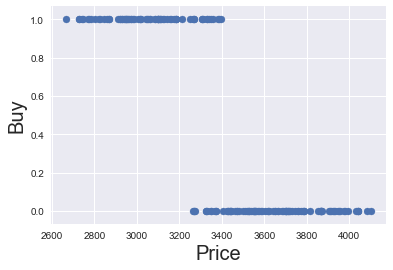

In [8]:
plt.scatter(x1,y, color='C0')
plt.xlabel('Price', fontsize = 20)
plt.ylabel('Buy', fontsize = 20)
plt.show()

### Plot with a regression line

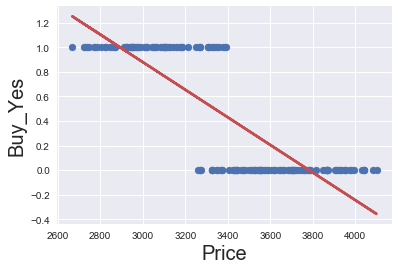

In [9]:
# Create regression
from sklearn.linear_model import LinearRegression

x = x1.values.reshape(-1,1)
reg = LinearRegression()
reg.fit(x,y)

# Create a scatter plot
plt.scatter(x,y,color = 'C0')
y_hat = x*reg.coef_[0] + reg.intercept_
plt.plot(x1,y_hat,lw=2.5,color='C8')
plt.xlabel('Price', fontsize = 20)
plt.ylabel('Buy_Yes', fontsize = 20)
plt.show()

### Logistic regression theory

### Logistic regression

In [10]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C=1e9, solver='lbfgs')
log_reg.fit(x,y)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [11]:
log_reg.coef_

array([[-0.02100243]])

In [12]:
log_reg.intercept_

array([ 69.91279706])

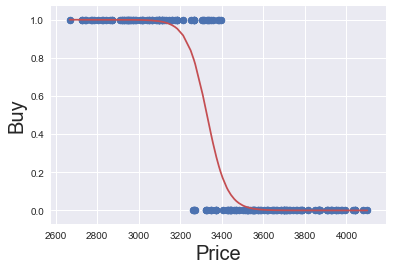

In [22]:
plt.scatter(x1,y,color='C0')
plt.xlabel('Price', fontsize = 20)
plt.ylabel('Buy', fontsize = 20)


y_hat = log_reg.predict_proba(x)[:,1]
y_hat[::-1].sort()
xp = np.sort(x1.values)
plt.plot(xp,y_hat,color='C8')

plt.show()